In [1]:
!pip install pandas matplotlib seaborn


Data loaded successfully!
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeInde

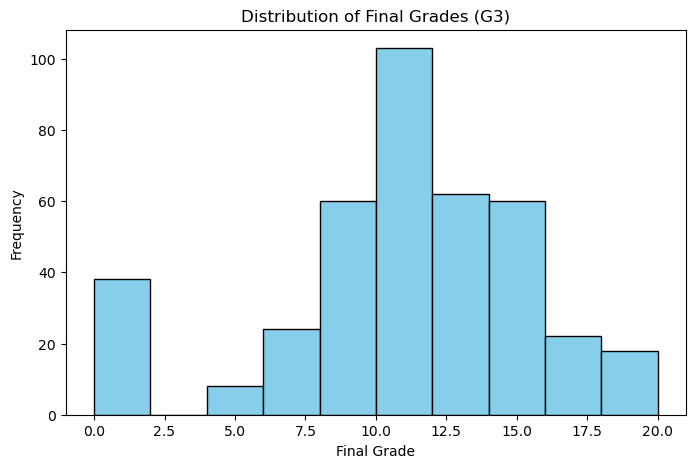

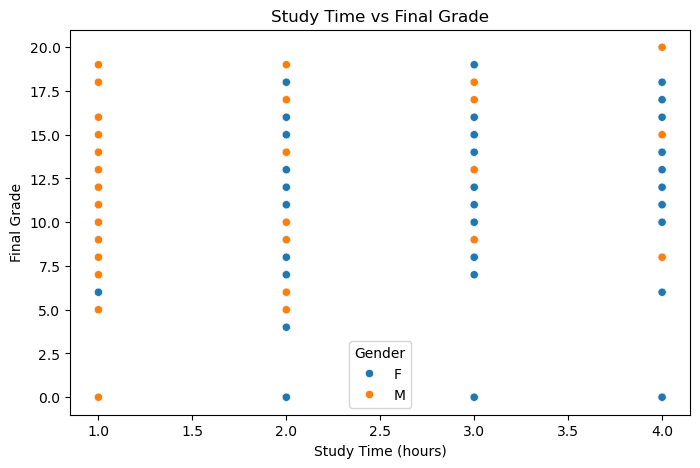

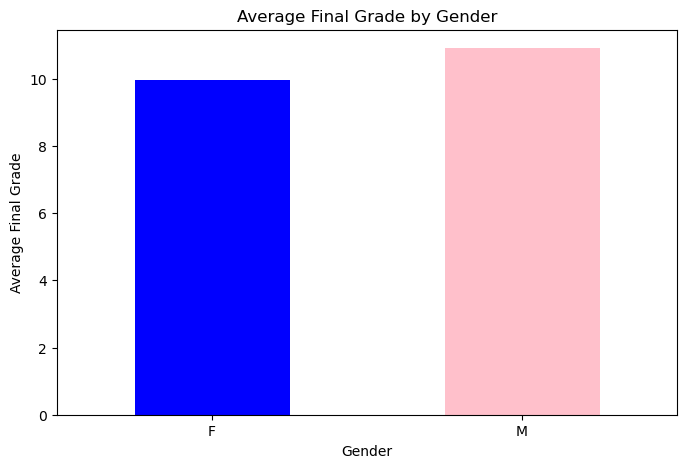

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url="https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
dataset_path = "student-mat.csv"

import urllib.request
import zipfile

urllib.request.urlretrieve(url, "student.zip")

with zipfile.ZipFile("student.zip", "r")as zip_ref:
    zip_ref.extractall(".")
    
    data = pd.read_csv("student-mat.csv", sep=";")
    print("Data loaded successfully!")

    print(data.head())
    print("\nDataset Info:")
    print(data.info())

    print("\nMissing Values:")
    print (data.isnull().sum())

    data = data.drop_duplicates()

    average_score = data['G3'].mean()
    print(f"\nAverage Math Score(G3): {average_score:.2f}")

    students_above_15 = len(data[data['G3'] > 15])
    print(f"Number of students scoring above 15: {students_above_15}")

    correlation = data['studytime'].corr(data['G3'])
    print(f"Correlation between study time and final grade: {correlation:.2f}")

    average_grade_by_gender = data.groupby('sex')['G3'].mean()
    print("\nAverage Final Grade by Gender:")
    print(average_grade_by_gender)

    plt.figure(figsize=(8, 5))
    plt.hist(data['G3'], bins=10, color='skyblue', edgecolor='black')
    plt.title("Distribution of Final Grades (G3)")
    plt.xlabel("Final Grade")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x='studytime', y='G3', hue='sex')
    plt.title("Study Time vs Final Grade")
    plt.xlabel("Study Time (hours)")
    plt.ylabel("Final Grade")
    plt.legend(title="Gender")    
    plt.show()

    plt.figure(figsize=(8, 5))
    average_grade_by_gender.plot(kind='bar', color=['blue', 'pink'])
    plt.title("Average Final Grade by Gender")
    plt.ylabel("Average Final Grade")
    plt.xlabel("Gender")
    plt.xticks(rotation=0)
    plt.show()